<a href="https://colab.research.google.com/github/kfuentestorres/Master-BI-BDA---Homeworks/blob/master/Review_Bombing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,842

In [43]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

In [44]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #nasconde browser all'interno del sistema operativo (non vedo che lavora)
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.metacritic.com/browse/games/score/metascore/all/all/filtered")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


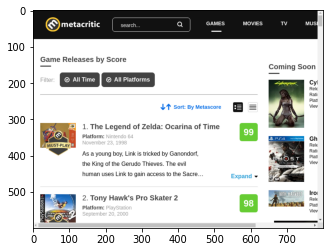

In [ ]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

# Reviews from Metacritic



In [ ]:
reviews = wd.find_elements_by_css_selector("td.clamp-summary-wrap")
print(len(reviews))

100


In [ ]:
print(reviews[0].text)

99
1.
The Legend of Zelda: Ocarina of Time
Platform: Nintendo 64
November 23, 1998
As a young boy, Link is tricked by Ganondorf, the King of the Gerudo Thieves. The evil human uses Link to gain access to the Sacred Realm, where he places his tainted hands on Triforce and transforms the beautiful Hyrulean landscape into a barren wasteland. Link is determined to fix the problems he helped to create, so with the help of Rauru he travels through time gathering the powers of the Seven Sages.


In [ ]:
print(reviews[0].find_elements_by_css_selector("a h3")[0].text)

The Legend of Zelda: Ocarina of Time


In [ ]:
print(reviews[0].find_elements_by_css_selector("input")[0].get_attribute("id"))

160692


In [ ]:
print(reviews[0].find_elements_by_css_selector("a.title")[0].get_attribute("href"))

https://www.metacritic.com/game/nintendo-64/the-legend-of-zelda-ocarina-of-time


In [ ]:
def parse_review(review):
  try:
    review_id = review.find_elements_by_css_selector("input")[0].get_attribute("id")
    title = review.find_elements_by_css_selector("a h3")[0].text
    url = review.find_elements_by_css_selector("a.title")[0].get_attribute("href")
  except:
    print("passato")
    pass
  return {'review_id': review_id,
          'url': url,
          'title': title}


In [ ]:
parse_review(reviews[0])

{'review_id': '160692',
 'title': 'The Legend of Zelda: Ocarina of Time',
 'url': 'https://www.metacritic.com/game/nintendo-64/the-legend-of-zelda-ocarina-of-time'}

In [ ]:
import time
detail_reviews = []
for num in tqdm(range(0,10)):
  time.sleep(1)
  wd.get(f"https://www.metacritic.com/browse/games/score/metascore/all/all/filtered?page={num}")
  list_reviews = wd.find_elements_by_css_selector("td.clamp-summary-wrap")
  for review in list_reviews:
    detail_reviews.append(parse_review(review))

print(len(detail_reviews))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



1000


In [ ]:
print(len(detail_reviews))

1000


In [ ]:
import pandas as pd
ds_detail_reviews = pd.DataFrame(detail_reviews)
ds_detail_reviews.set_index("review_id")
ds_detail_reviews.head()

,review_id,url,title
0,160692,https://www.metacritic.com/game/nintendo-64/th...,The Legend of Zelda: Ocarina of Time
1,160779,https://www.metacritic.com/game/playstation/to...,Tony Hawk's Pro Skater 2
2,108362,https://www.metacritic.com/game/playstation-3/...,Grand Theft Auto IV
3,160751,https://www.metacritic.com/game/dreamcast/soul...,SoulCalibur
4,108363,https://www.metacritic.com/game/xbox-360/grand...,Grand Theft Auto IV


In [ ]:
ds_detail_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  1000 non-null   object
 1   url        1000 non-null   object
 2   title      1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [ ]:
ds_detail_reviews.to_csv('ds_reviews.csv')

In [ ]:
# open csv file
import pandas as pd
ds_detail_reviews = pd.read_csv("ds_reviews.csv", index_col="review_id")
ds_detail_reviews.head()

,Unnamed: 0,url,title
review_id,,,
160692,0,https://www.metacritic.com/game/nintendo-64/th...,The Legend of Zelda: Ocarina of Time
160779,1,https://www.metacritic.com/game/playstation/to...,Tony Hawk's Pro Skater 2
108362,2,https://www.metacritic.com/game/playstation-3/...,Grand Theft Auto IV
160751,3,https://www.metacritic.com/game/dreamcast/soul...,SoulCalibur
108363,4,https://www.metacritic.com/game/xbox-360/grand...,Grand Theft Auto IV


In [ ]:
ds_detail_reviews['url'].head()

review_id
160692    https://www.metacritic.com/game/nintendo-64/th...
160779    https://www.metacritic.com/game/playstation/to...
108362    https://www.metacritic.com/game/playstation-3/...
160751    https://www.metacritic.com/game/dreamcast/soul...
108363    https://www.metacritic.com/game/xbox-360/grand...
Name: url, dtype: object

In [ ]:
detail_score = []
for review_id, review in tqdm(ds_detail_reviews.iterrows(),total=ds_detail_reviews.shape[0]):
  time.sleep(1)
  url = review["url"]
  wd.get(url)
  try:
    title = wd.find_elements_by_css_selector("a h1")[0].text
    platform = wd.find_elements_by_css_selector("li.summary_detail.publisher > span.data > a")[0].text
    publisher = wd.find_elements_by_css_selector("li.publisher span.data")[0].text
    developer = wd.find_elements_by_css_selector("li.developer span.data")[0].text
    genre = wd.find_elements_by_css_selector("li.product_genre")[0].text
    players = wd.find_elements_by_css_selector("li.product_players span.data")[0].text
    release = wd.find_elements_by_css_selector("li.release_data span.data")[0].text
    score_meta = wd.find_elements_by_css_selector("div.game span")[0].text
    score_user = wd.find_elements_by_css_selector("div.details.side_details > div:nth-child(1) > div > a > div")[0].text
  except:
    print("passato")
    pass
  detail_score.append ({'review_id': review_id,
                      'title': title,
                      'platform': platform,
                      'publisher': publisher,
                      'developer': developer,
                      'genre': genre,
                      'players': players,
                      'release': release,
                      'score_meta': score_meta,
                      'score_user': score_user})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato
passato


In [ ]:
print(len(detail_score))

1000


In [ ]:
ds_detail_score = pd.DataFrame(detail_score)
ds_detail_score.set_index("review_id")
ds_detail_score.head()

,review_id,title,platform,publisher,developer,genre,players,release,score_meta,score_user
0,160692,THE LEGEND OF ZELDA: OCARINA OF TIME,Nintendo,Nintendo,Nintendo,"Genre(s): Action Adventure, Fantasy",1 Player,"Nov 23, 1998",99,9.1
1,160779,TONY HAWK'S PRO SKATER 2,Activision,Activision,Neversoft Entertainment,"Genre(s): Sports, Alternative, Skateboarding",1-2,"Sep 20, 2000",98,7.4
2,108362,GRAND THEFT AUTO IV,Rockstar Games,Rockstar Games,Rockstar North,"Genre(s): Action Adventure, Modern, Modern, Op...",1 Player,"Apr 29, 2008",98,7.6
3,160751,SOULCALIBUR,Namco,Namco,Namco,"Genre(s): Action, Fighting, 3D",1-2,"Sep 8, 1999",98,8.5
4,108363,GRAND THEFT AUTO IV,Rockstar Games,Rockstar Games,Rockstar North,"Genre(s): Action Adventure, Modern, Modern, Op...",1 Player,"Apr 29, 2008",98,7.9


In [ ]:
ds_detail_score.to_csv('ds_reviews_score.csv')

The last of us Part II - reviews

In [45]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.metacritic.com/game/playstation-4/the-last-of-us-part-ii/user-reviews")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [109]:
reviews_user = wd.find_elements_by_css_selector("li.user_review")
print(len(reviews))

100


In [110]:
#id
print(reviews_user[0].get_attribute("id"))

user_review_11488987


In [111]:
#username
print(reviews_user[0].find_elements_by_css_selector("div.name")[0].text)

Fangenijus


In [112]:
#voto
print(reviews_user[0].find_elements_by_css_selector("div.metascore_w")[0].text)

3


In [113]:
#release
print(reviews_user[0].find_elements_by_css_selector("div.date")[0].text)

Jun 19, 2020


In [114]:
#body
try:
  reviews_user[1].find_element_by_css_selector("span.toggle_expand").click()
  print(reviews_user[1].find_elements_by_css_selector("div.review_body")[0].text)
except:
  print(reviews_user[1].find_elements_by_css_selector("div.review_body")[0].text)

My disappointment is immeasurable, and my day is ruined.
I waited 5 years to play this
And they gave me a horrible intro and **** ending
I just want to forget about this game.


In [119]:
def parse_review_user(review):
  try:
    review_id = review.get_attribute("id")
    username = review.find_elements_by_css_selector("div.name")[0].text
    score = review.find_elements_by_css_selector("div.metascore_w")[0].text
    release = review.find_elements_by_css_selector("div.date")[0].text
    try:
      review.find_element_by_css_selector("span.toggle_expand").click()
      body = review.find_elements_by_css_selector("div.review_body")[0].text
    except:
      body = review.find_elements_by_css_selector("div.review_body")[0].text
  except:
    print("passato")
    pass
  return {'review_id': review_id,
          'username': username,
          'score': score,
          'release': release,
          'body': body}

In [125]:
import time
detail_reviews_user = []
for num in tqdm(range(0,10)):
  time.sleep(1)
  wd.get(f"https://www.metacritic.com/game/playstation-4/the-last-of-us-part-ii/user-reviews?page={num}")
  list_reviews = wd.find_elements_by_css_selector("li.user_review")
  for review in list_reviews:
    detail_reviews_user.append(parse_review_user(review))

print(len(detail_reviews))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



1000


In [127]:
ds_detail_reviews_user = pd.DataFrame(detail_reviews_user)
ds_detail_reviews_user.set_index("review_id")
ds_detail_reviews_user.head()

,review_id,username,score,release,body
0,user_review_11488987,Fangenijus,3,"Jun 19, 2020","It breaks my heart to write this, but I really..."
1,user_review_11523334,Sijun,4,"Jun 19, 2020",This review contains spoilers. So I got the ga...
2,user_review_11496626,Bulgwang,0,"Jun 19, 2020","My disappointment is immeasurable, and my day ..."
3,user_review_11490069,NarmanHammer,3,"Jun 19, 2020",This review contains spoilers. The Last of Us ...
4,user_review_11549291,MatrixRebel,4,"Jun 22, 2020",Oh boy... Where to begin...\n\nIf you are like...


In [128]:
ds_detail_reviews_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  1000 non-null   object
 1   username   1000 non-null   object
 2   score      1000 non-null   object
 3   release    1000 non-null   object
 4   body       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [129]:
ds_detail_reviews_user.to_csv('ds_reviews_user.csv')